# A Complex Example

### [Get your Own API KEY Today!](https://www.private-ai.com/start)

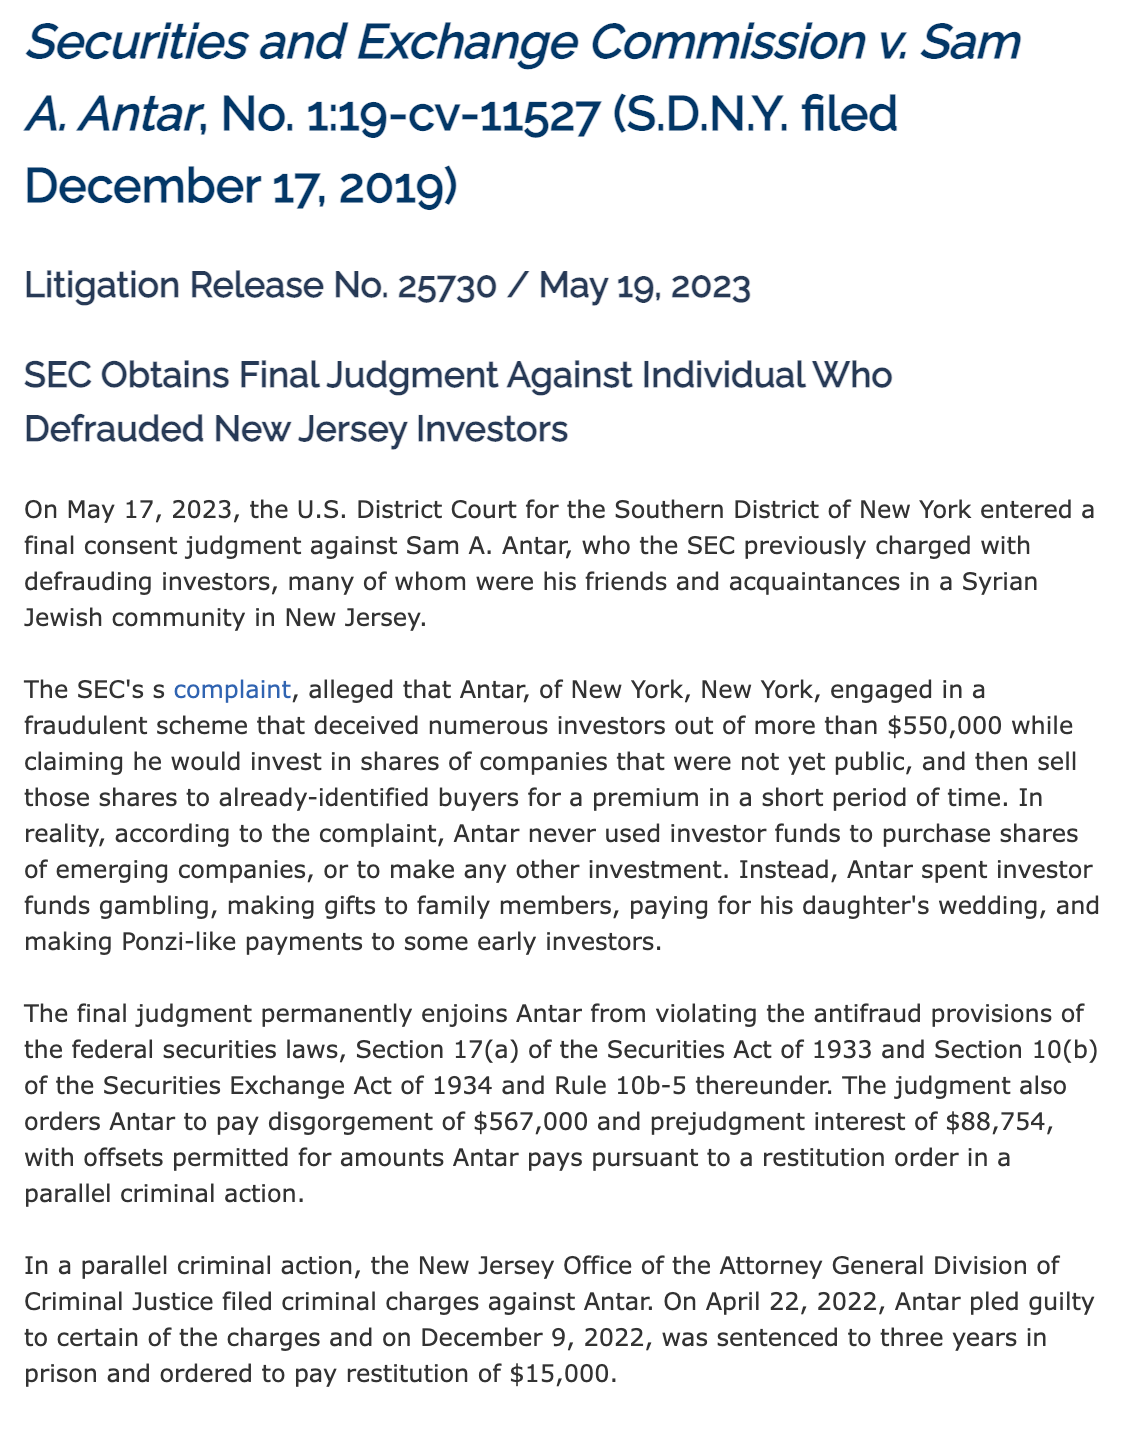

In [1]:
from privateai_client import PAIClient
from privateai_client import request_objects
import cohere
import os
PRIVATEAI_API_KEY = "YOUR_PAI_API_KEY" #this is required only if you are using our public API
PRIVATEAI_URL = "YOUR PAI URL HERE" # your hosted URL, or our public demo URL
COHERE_API_KEY = "YOUR_COHERE_API_KEY"

In [3]:
raw_sample_text = """
On May 17, 2023, the U.S. District Court for the Southern District of New York entered a final consent judgment against Sam A. Antar, who the SEC previously charged with defrauding investors, many of whom were his friends and acquaintances in a Syrian Jewish community in New Jersey.
The SEC's s complaint, alleged that Antar, of New York, New York, engaged in a fraudulent scheme that deceived numerous investors out of more than $550,000 while claiming he would invest in shares of companies that were not yet public, and then sell those shares to already-identified buyers for a premium in a short period of time. In reality, according to the complaint, Antar never used investor funds to purchase shares of emerging companies, or to make any other investment. Instead, Antar spent investor funds gambling, making gifts to family members, paying for his daughter's wedding, and making Ponzi-like payments to some early investors.
The final judgment permanently enjoins Antar from violating the antifraud provisions of the federal securities laws, Section 17(a) of the Securities Act of 1933 and Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder. The judgment also orders Antar to pay disgorgement of $567,000 and prejudgment interest of $88,754, with offsets permitted for amounts Antar pays pursuant to a restitution order in a parallel criminal action.
In a parallel criminal action, the New Jersey Office of the Attorney General Division of Criminal Justice filed criminal charges against Antar. On April 22, 2022, Antar pled guilty to certain of the charges and on December 9, 2022, was sentenced to three years in prison and ordered to pay restitution of $15,000.
"""

In [4]:
client = PAIClient("https", PRIVATEAI_URL )
client.add_api_key(PRIVATEAI_API_KEY)

co = cohere.Client(COHERE_API_KEY)

In [5]:
def cohere_summary(text):
    response = co.summarize( 
        model='summarize-xlarge', 
        length='medium',
        extractiveness='medium',
        text=text
    )
    summary = response.summary
    return summary

In [12]:
# Deidentify the text
def new_secure_completion(prompt, raw_text):
    completions = {}
    request_obj = request_objects.process_text_obj(text=[raw_text])
    response_obj = client.process_text(request_obj)

    # Store the response data
    deidentified_text = response_obj.processed_text[0]
    completions['redactect_raw_text'] = deidentified_text
    entity_list = response_obj.get_reidentify_entities()
    response = co.generate(
      model='command',
      prompt=f'{prompt}: {deidentified_text}',
      max_tokens=300,
      temperature=0.9,
      k=0,
      stop_sequences=[],
      return_likelihoods='NONE')
    completion = response.generations[0].text
    completions["redacted"] = completion
    # # Call the reidentify Route
    request_obj = request_objects.reidentify_text_obj(
        processed_text=[completion], entities=entity_list
    )
    response_obj = client.reidentify_text(request_obj)
    completions["reidentified"] = response_obj.body[0]
    return completions

In [13]:
secure_completion_text = new_secure_completion(
    "Itemize this document",
    raw_sample_text
)

In [14]:
from IPython.display import display, Markdown, Latex
print("****************************************************************************")
print("REDACTED INPUT TEXT")
print("****************************************************************************")
print(secure_completion_text['redactect_raw_text'])
print("****************************************************************************")
print("REDACTED SUMMARY FROM COHERE")
print("****************************************************************************")
print(secure_completion_text["redacted"])
print("****************************************************************************")
print("RE-IDENTIFIED COMPLETION")
print("****************************************************************************")
print(secure_completion_text["reidentified"])

****************************************************************************
REDACTED INPUT TEXT
****************************************************************************

On [DATE_1], the [ORGANIZATION_1] entered a final consent judgment against [NAME_1], who the [ORGANIZATION_2] previously charged with defrauding [OCCUPATION_1], many of whom were his friends and acquaintances in a [RELIGION_1] community in [LOCATION_STATE_1].
The [ORGANIZATION_2]'s s complaint, alleged that [NAME_FAMILY_1], of [LOCATION_1], engaged in a fraudulent scheme that deceived numerous [OCCUPATION_1] out of more than [MONEY_1] while claiming he would invest in shares of companies that were not yet public, and then sell those shares to already-identified buyers for a premium in a short period of time. In reality, according to the complaint, [NAME_FAMILY_1] never used [OCCUPATION_2] funds to purchase shares of emerging companies, or to make any other investment. Instead, [NAME_FAMILY_1] spent [OCCUPATION_2] 

In [15]:
print(new_secure_completion(
    "what is the amnount of Disgorgement in this document. Return only the dollar amount",
    raw_sample_text)["reidentified"])

The amount of disgorgement is $567,000.


In [16]:
print(new_secure_completion(
    "Please create a json array of all of the money mentioned in this document where the key is the type of fee",
    raw_sample_text)["reidentified"])

{
  "disgorgement": $567,000,
  "prejudgment interest": $88,754,
  "securities laws": $550,000,
  "share premium": $567,000,
  "share sale": $550,000,
  "shares": $567,000,
  "shares of emerging companies": $550,000,
  " offsets": $15,000,
  "restitution": $15,000,
  "parallel criminal action": $15,000,
  "securities act": $550,000,
  "securities exchange act": $567,000,
  "interest": $88,754,
  "prejudgment interest": $88,754,
  "criminal charges": $15,000,
  "criminal charges filed": $15,000,
  "plead guilty": $15,000,
  "pay restitution": $15,000,
  "restitution order": $15,000,
  "final consent judgment": $550,000,
  "enter final consent judgment": $550,000,
  "organisation 1": $550,000,
  "name 1": $550,000,
  "organisation 2": $550,000,
  "name family 1": $550,000,
  "occupation
